Problem-1)

Prepare rules for Book data set

Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

Change the minimum length in apriori algorithm

Visulize the obtained rules using different plots

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
df=pd.read_csv("book.csv")
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


EDA

In [5]:
df.shape

(2000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [8]:
df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

No null values are availble in the data 

In [11]:
for i in df.columns:
  print('\n Number of unique oservations in',df[i].name,':',len(df[i].unique()))
  print(' \n Different observations with count in ',df[i].name,':\n',df[i].value_counts())
  print('------------------------------------------------------------------')


 Number of unique oservations in ChildBks : 2
 
 Different observations with count in  ChildBks :
 0    1154
1     846
Name: ChildBks, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in YouthBks : 2
 
 Different observations with count in  YouthBks :
 0    1505
1     495
Name: YouthBks, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in CookBks : 2
 
 Different observations with count in  CookBks :
 0    1138
1     862
Name: CookBks, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in DoItYBks : 2
 
 Different observations with count in  DoItYBks :
 0    1436
1     564
Name: DoItYBks, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in RefBks : 2
 
 Different observations with count in  RefBks :
 0    1571
1     429
Name: RefBks, dtype: in

In [13]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
book_sale_counts=pd.DataFrame(df.sum()).reset_index()
book_sale_counts.rename(columns={'index':'book_name',0:'sales'},inplace=True)
book_sale_counts=book_sale_counts.sort_values('sales',ascending=False).reset_index()
book_sale_counts=book_sale_counts.drop('index',axis=1)
book_sale_counts

,book_name,sales
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


VISUALISATION

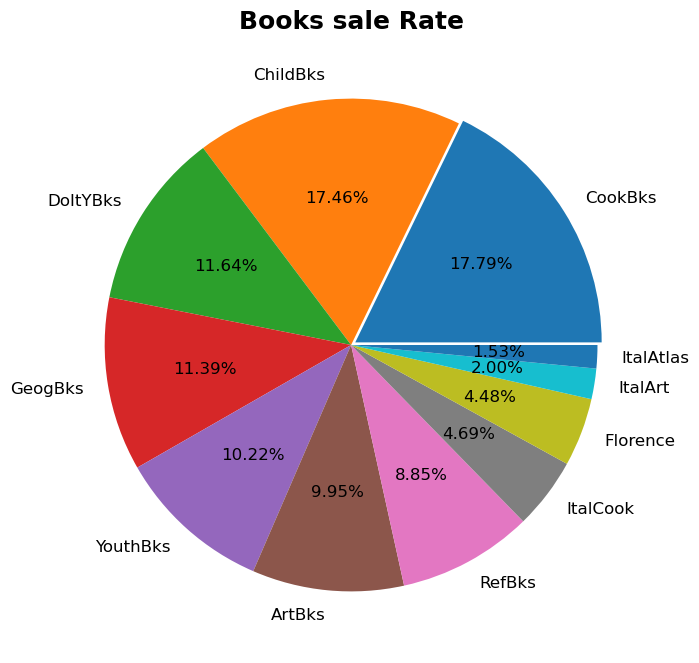

In [17]:
plt.figure(figsize = (8,8))
plt.pie(book_sale_counts['sales'], labels= book_sale_counts['book_name'],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', textprops = {'size': 12})

plt.title("Books sale Rate", fontsize = 18, fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Books sale Frequency')

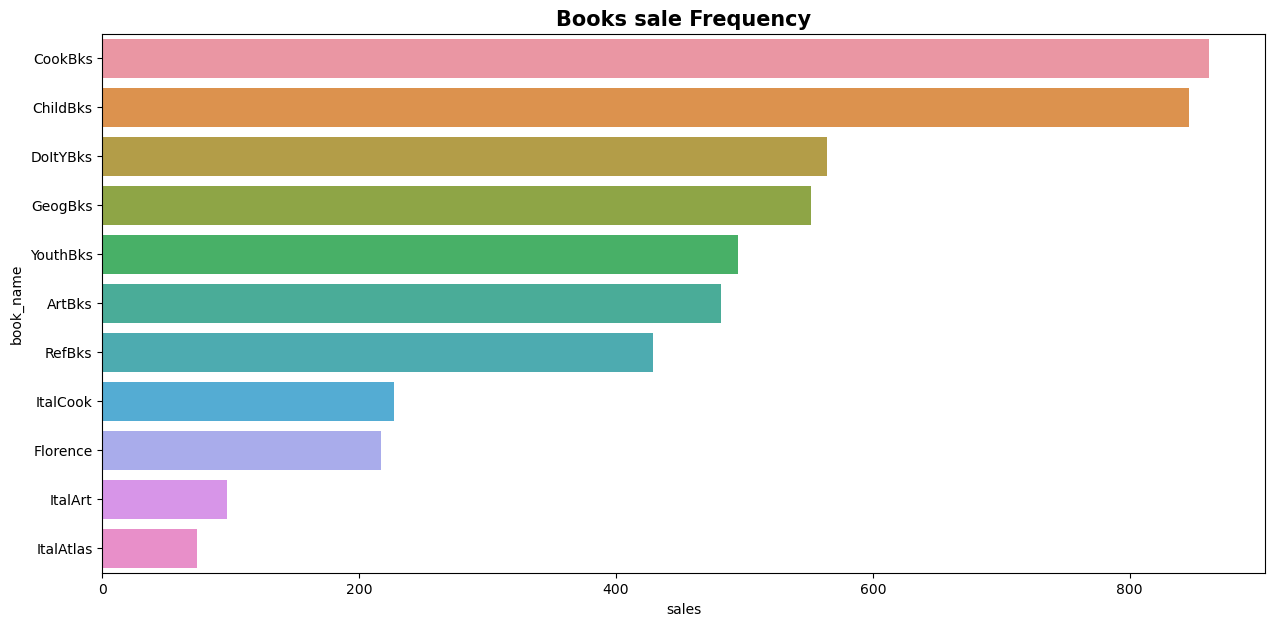

In [18]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x = 'sales', y = 'book_name', data= book_sale_counts)
plt.title('Books sale Frequency',  fontsize = 15, fontweight = 'bold')

Apriori Algorithm

Trail 1

support 15% Confidence 30%

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets1=apriori(df,min_support=0.15,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [26]:
rules1=association_rules(frequent_itemsets1,metric="lift",min_threshold=0.3)
rules1_sorted=rules1.sort_values('lift',ascending=False)
rules1_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
17,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621,0.692045
16,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
20,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689
21,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361,0.671435
18,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125,0.664355
19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095,0.498047


Text(0.5, 0, 'lift')

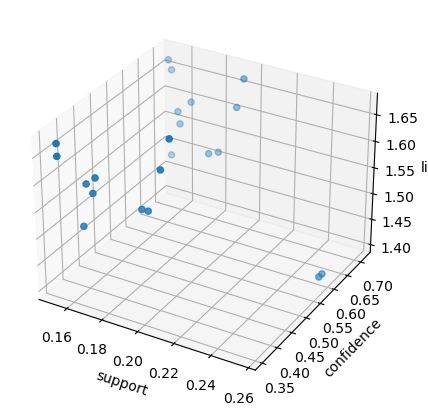

In [27]:

fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules1_sorted['support'],rules1_sorted['confidence'],rules1_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

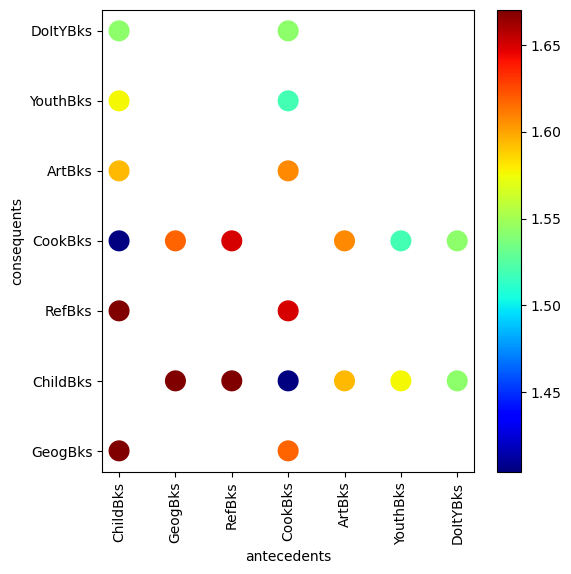

In [28]:

X = rules1_sorted.antecedents
Y = rules1_sorted.consequents
Z = rules1_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

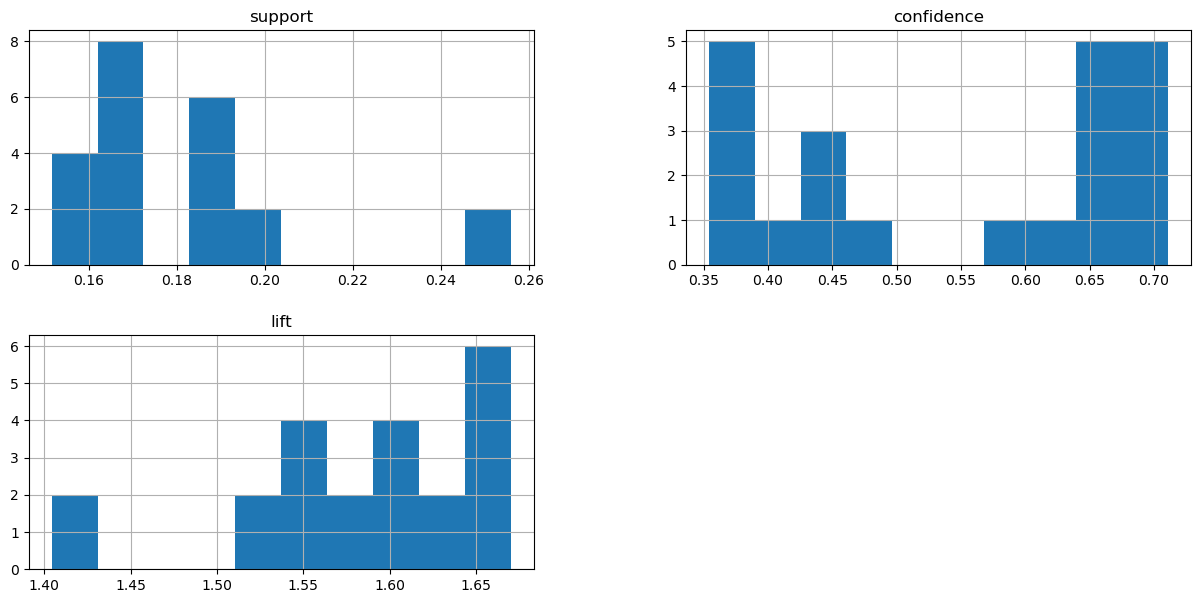

In [29]:
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

trail-2

support 18%,confidence 50%

In [32]:
frequent_itemsets2=apriori(df,min_support=0.18,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"
8,0.1840,"(DoItYBks, ChildBks)"
9,0.1950,"(GeogBks, ChildBks)"


In [33]:
rules2=association_rules(frequent_itemsets2,metric="lift",min_threshold=0.5)
rules2_sorted=rules2.sort_values('lift',ascending=False)
rules2_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
4,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
8,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689
9,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361,0.671435
6,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968,0.489939
7,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875,0.618236
3,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
2,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
0,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


Text(0.5, 0, 'lift')

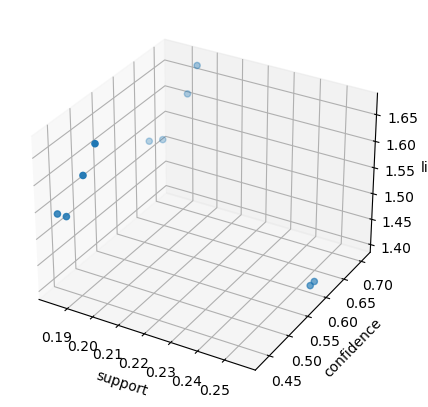

In [35]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules2_sorted['support'],rules2_sorted['confidence'],rules2_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

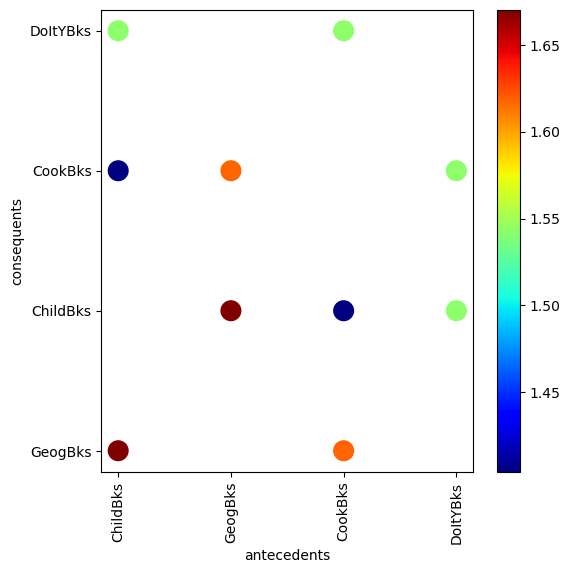

In [36]:
X = rules2_sorted.antecedents
Y = rules2_sorted.consequents
Z = rules2_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()


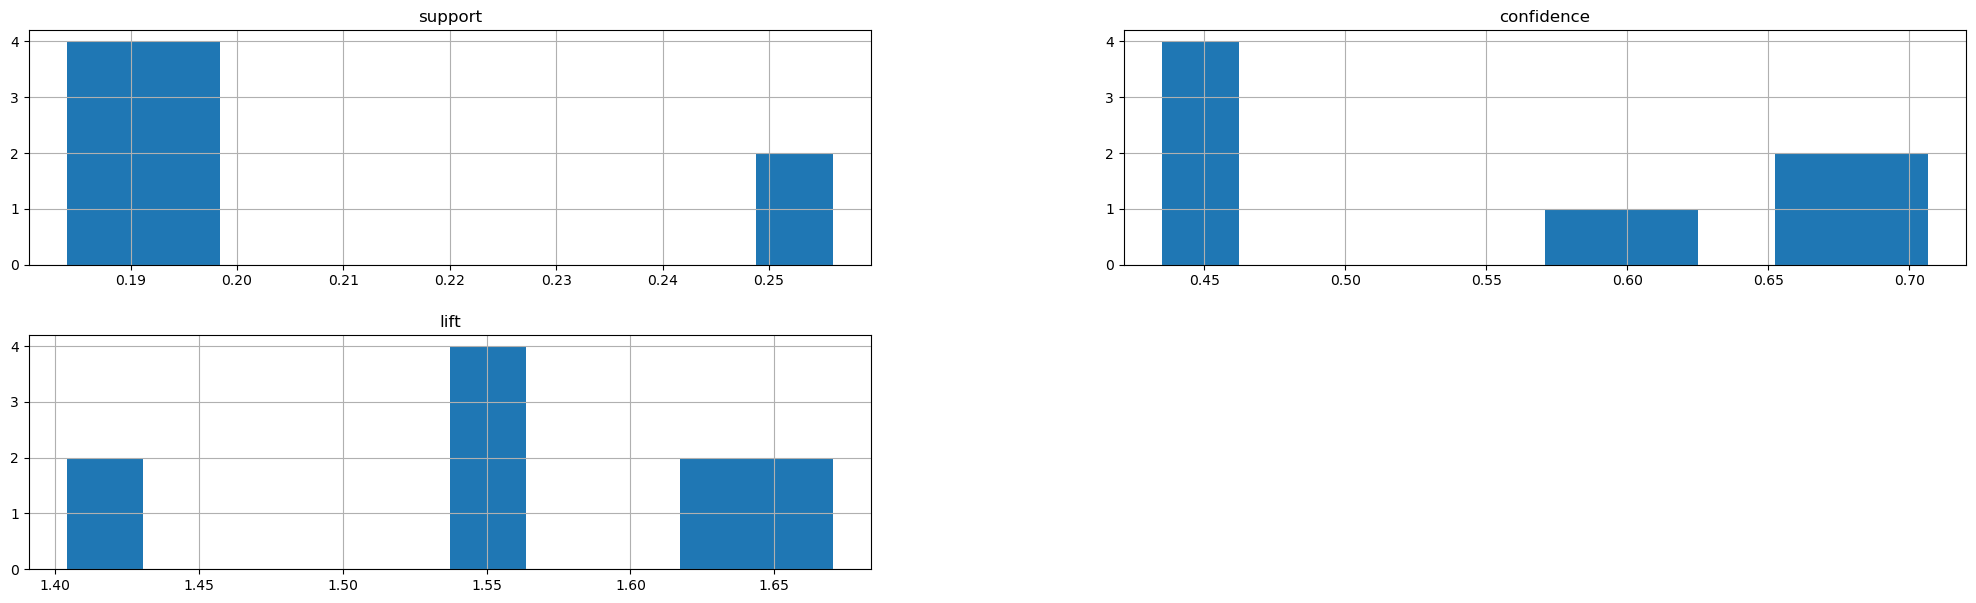

In [37]:
rules2[['support','confidence','lift']].hist(figsize=(25,7))
plt.show()

trail-3

support 20%,confidence 70%

In [39]:
frequent_itemsets3=apriori(df,min_support=0.20,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [40]:

rules3=association_rules(frequent_itemsets3,metric="lift",min_threshold=0.7).reset_index()
rules3_sorted=rules3.sort_values('lift',ascending=False)
rules3_sorted

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


Text(0.5, 0, 'lift')

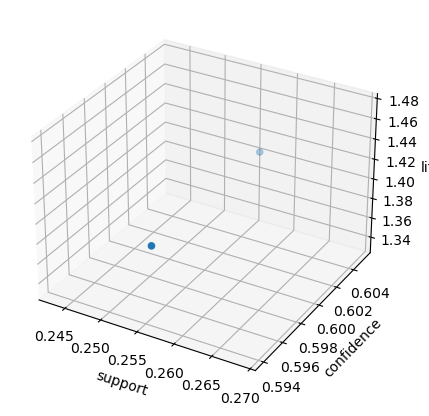

In [41]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules3_sorted['support'],rules3_sorted['confidence'],rules3_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

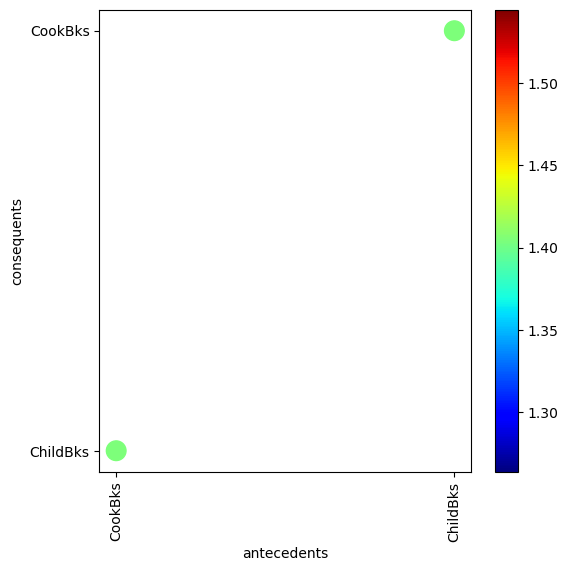

In [42]:
X = rules3_sorted.antecedents
Y = rules3_sorted.consequents
Z = rules3_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

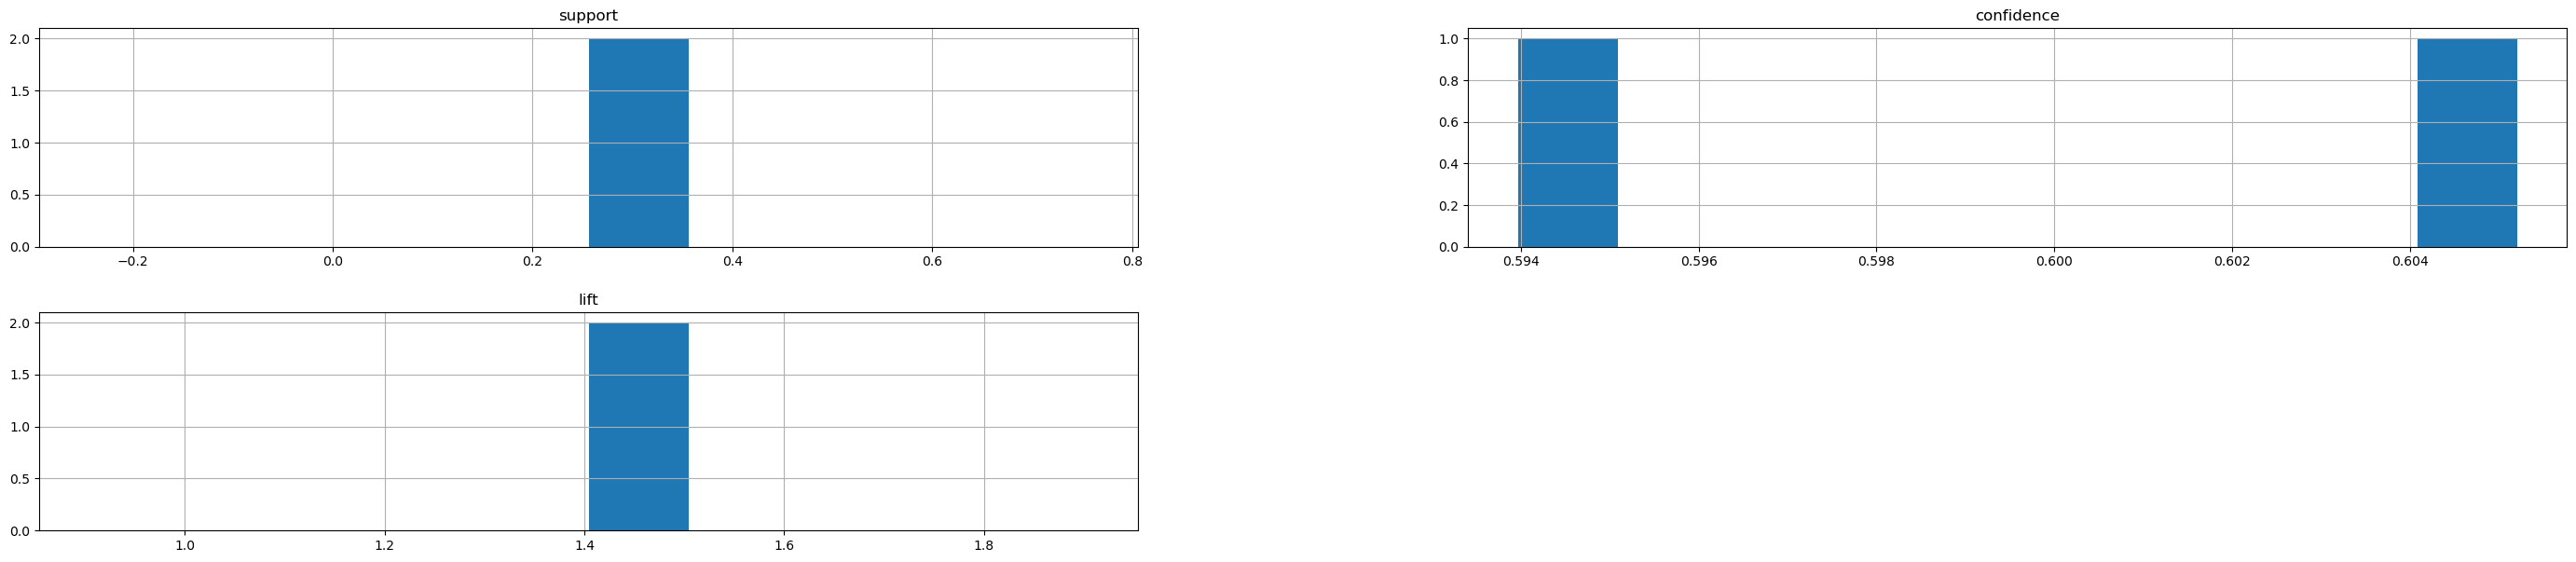

In [43]:
rules3[['support','confidence','lift']].hist(figsize=(35,7))
plt.show()

In [44]:
def lift_plot(table):
  plt.figure(figsize=(7,7), dpi= 300)
  sns.heatmap(table.pivot('antecedents','consequents','lift'), annot=True)
  plt.title('HeatMap - Antecedents,Consequents and Lift -Matrix',fontsize= 15)
  plt.yticks(rotation=0, fontsize= 5)
  plt.xticks(rotation=40, fontsize= 5)
  plt.show()

 Trail1 support = 13%,confidence=30%


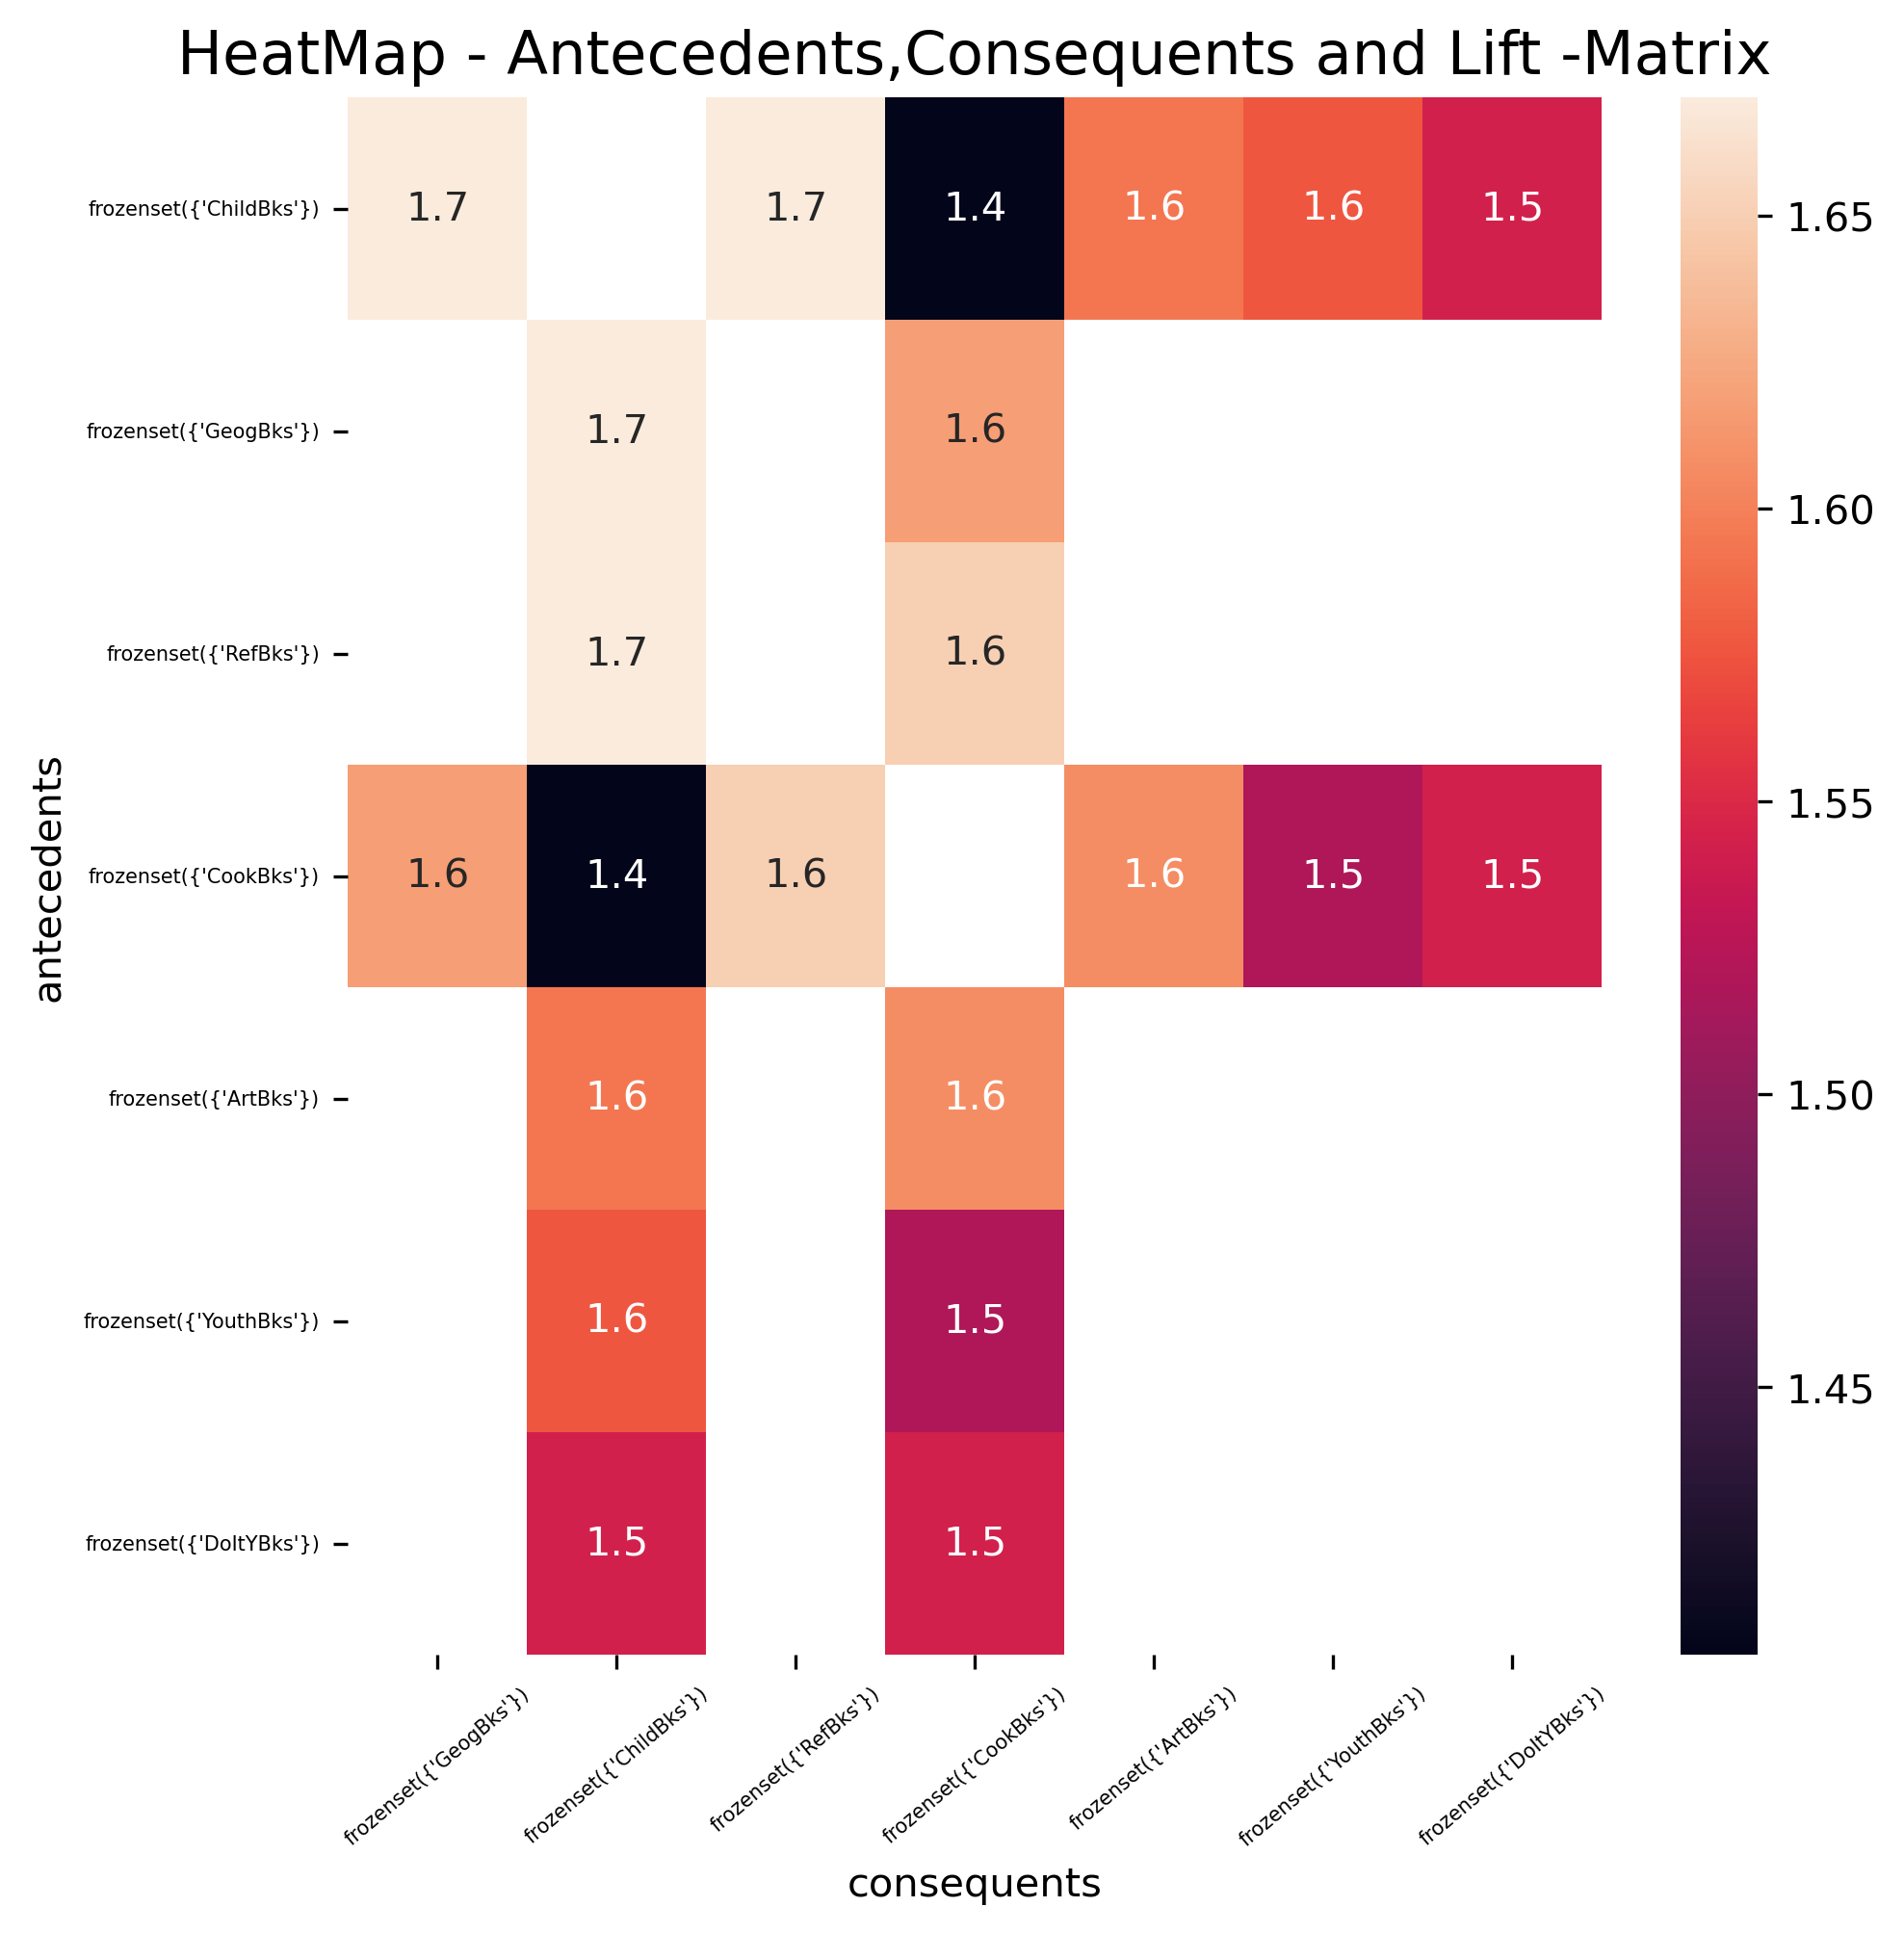


 Trail2 support = 15%,confidence=50%


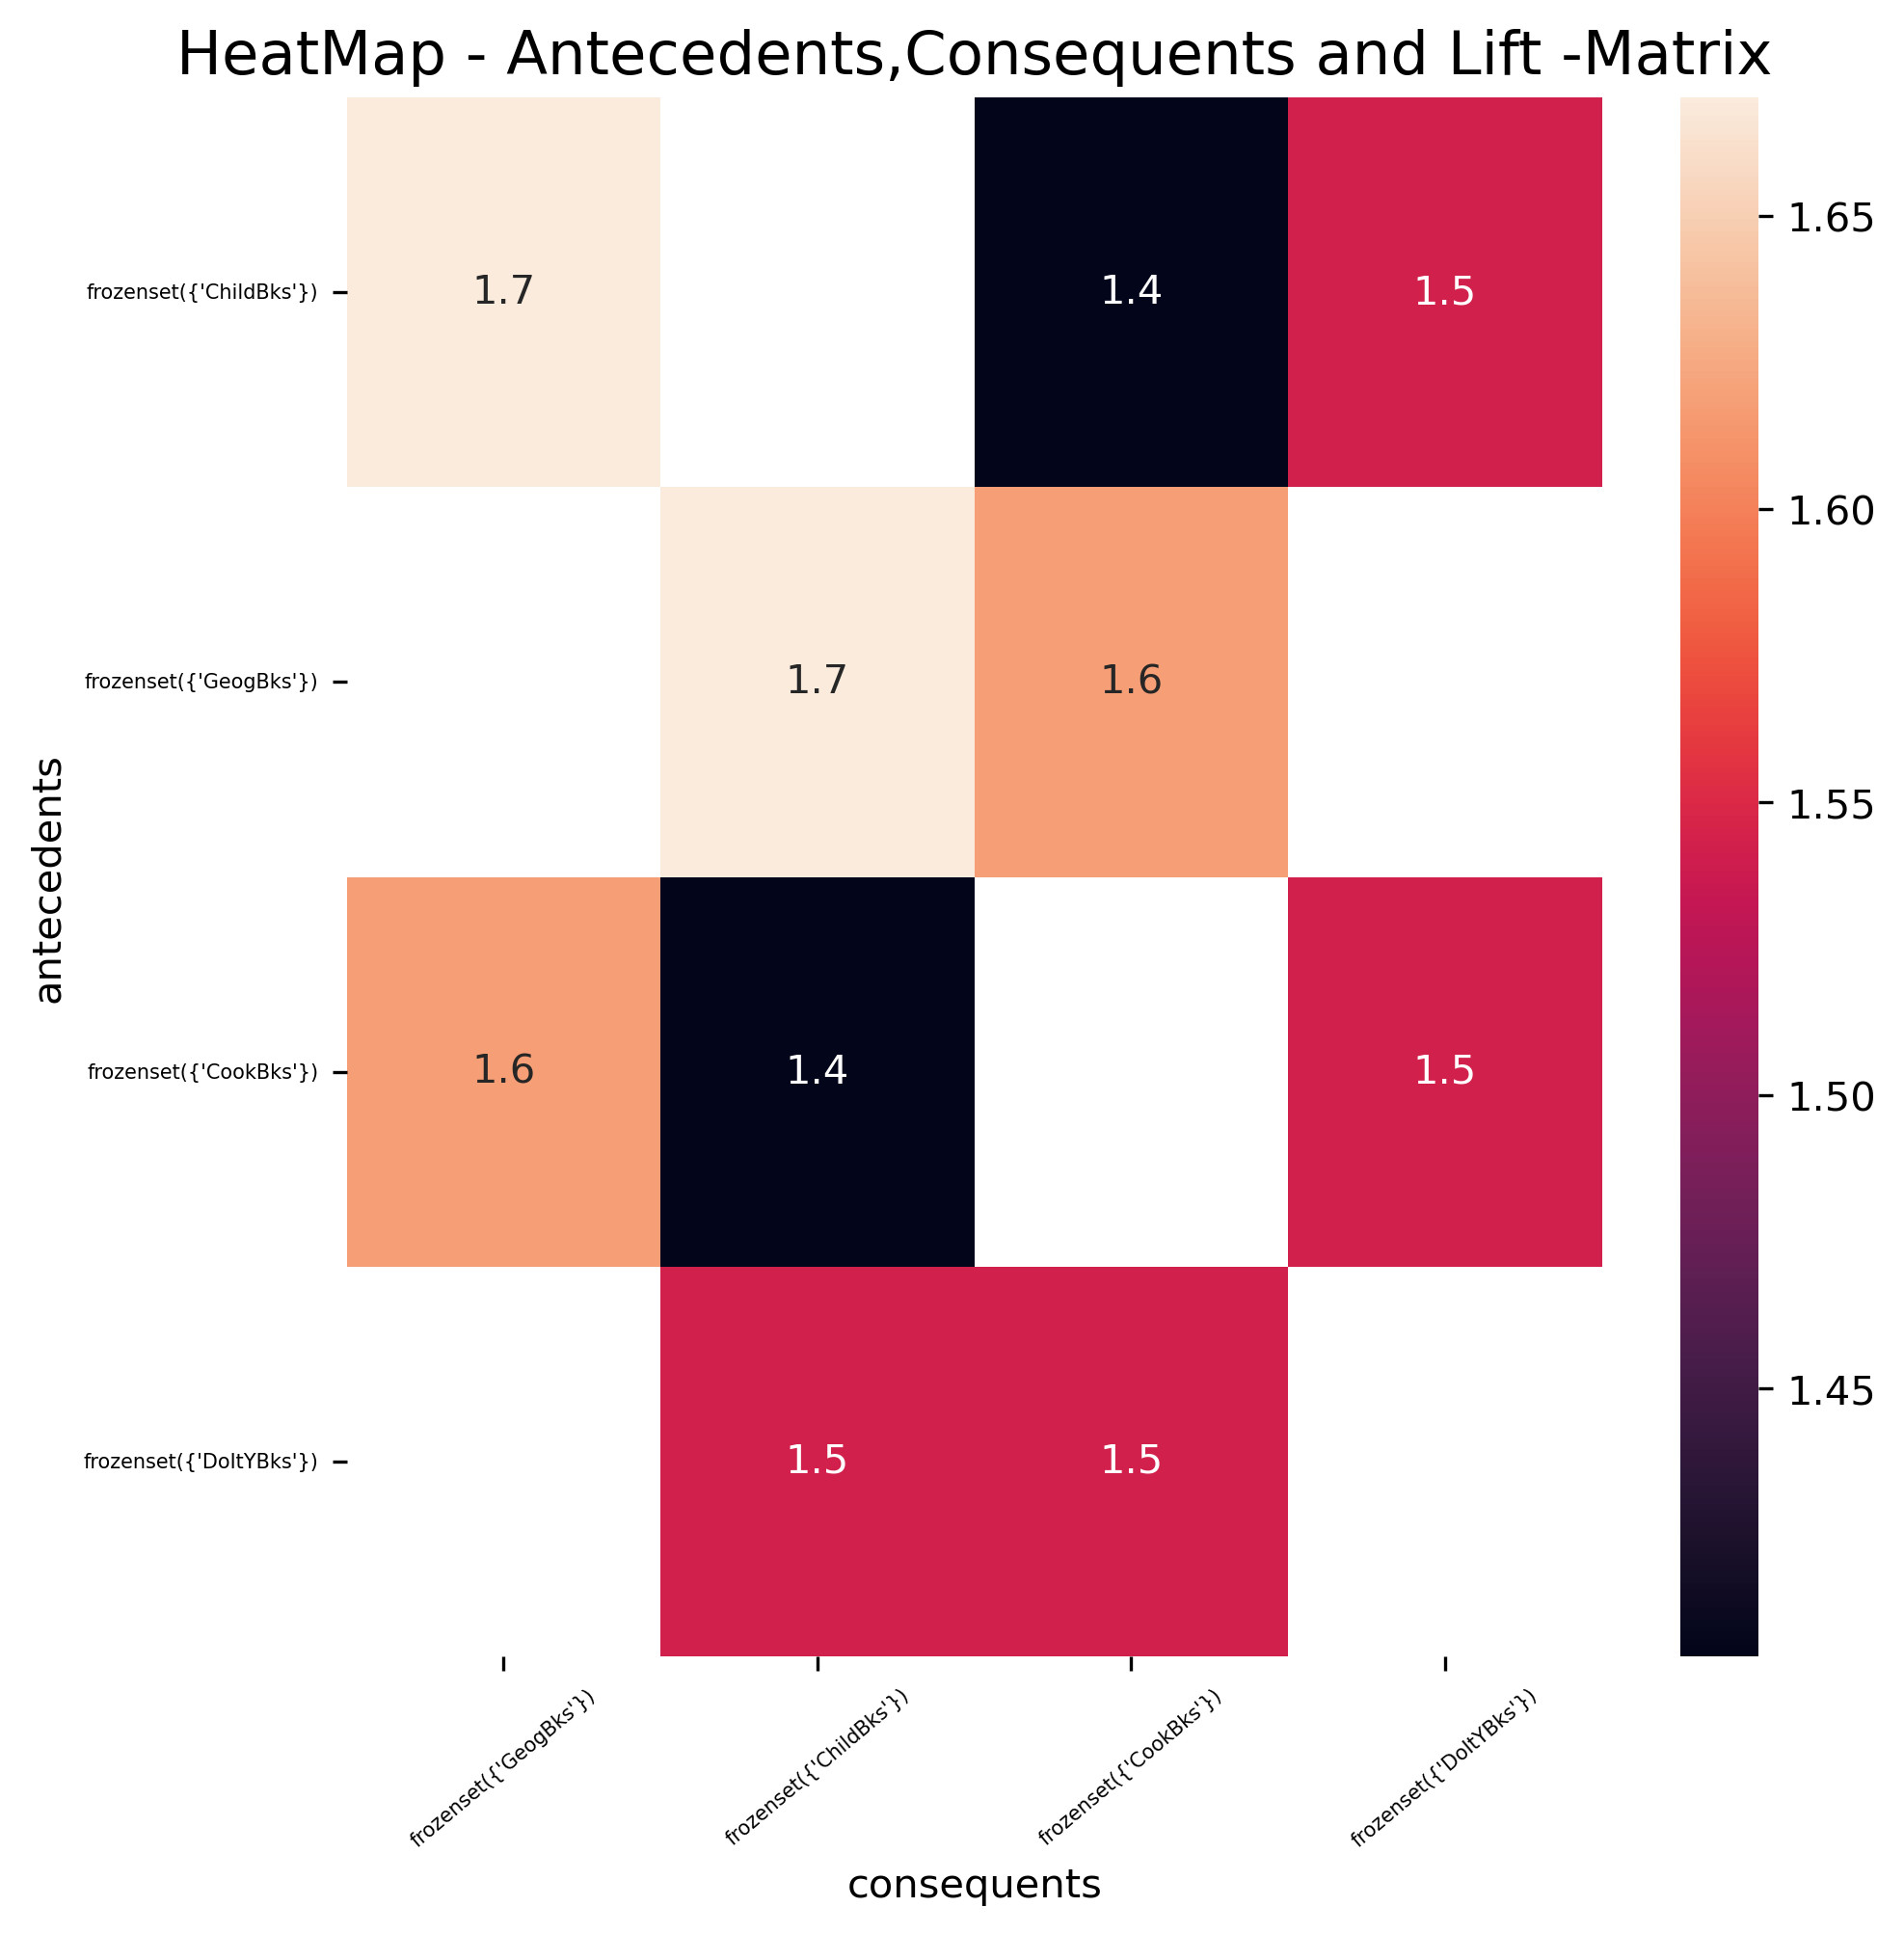


 Trail3 support = 20%,confidence=70%


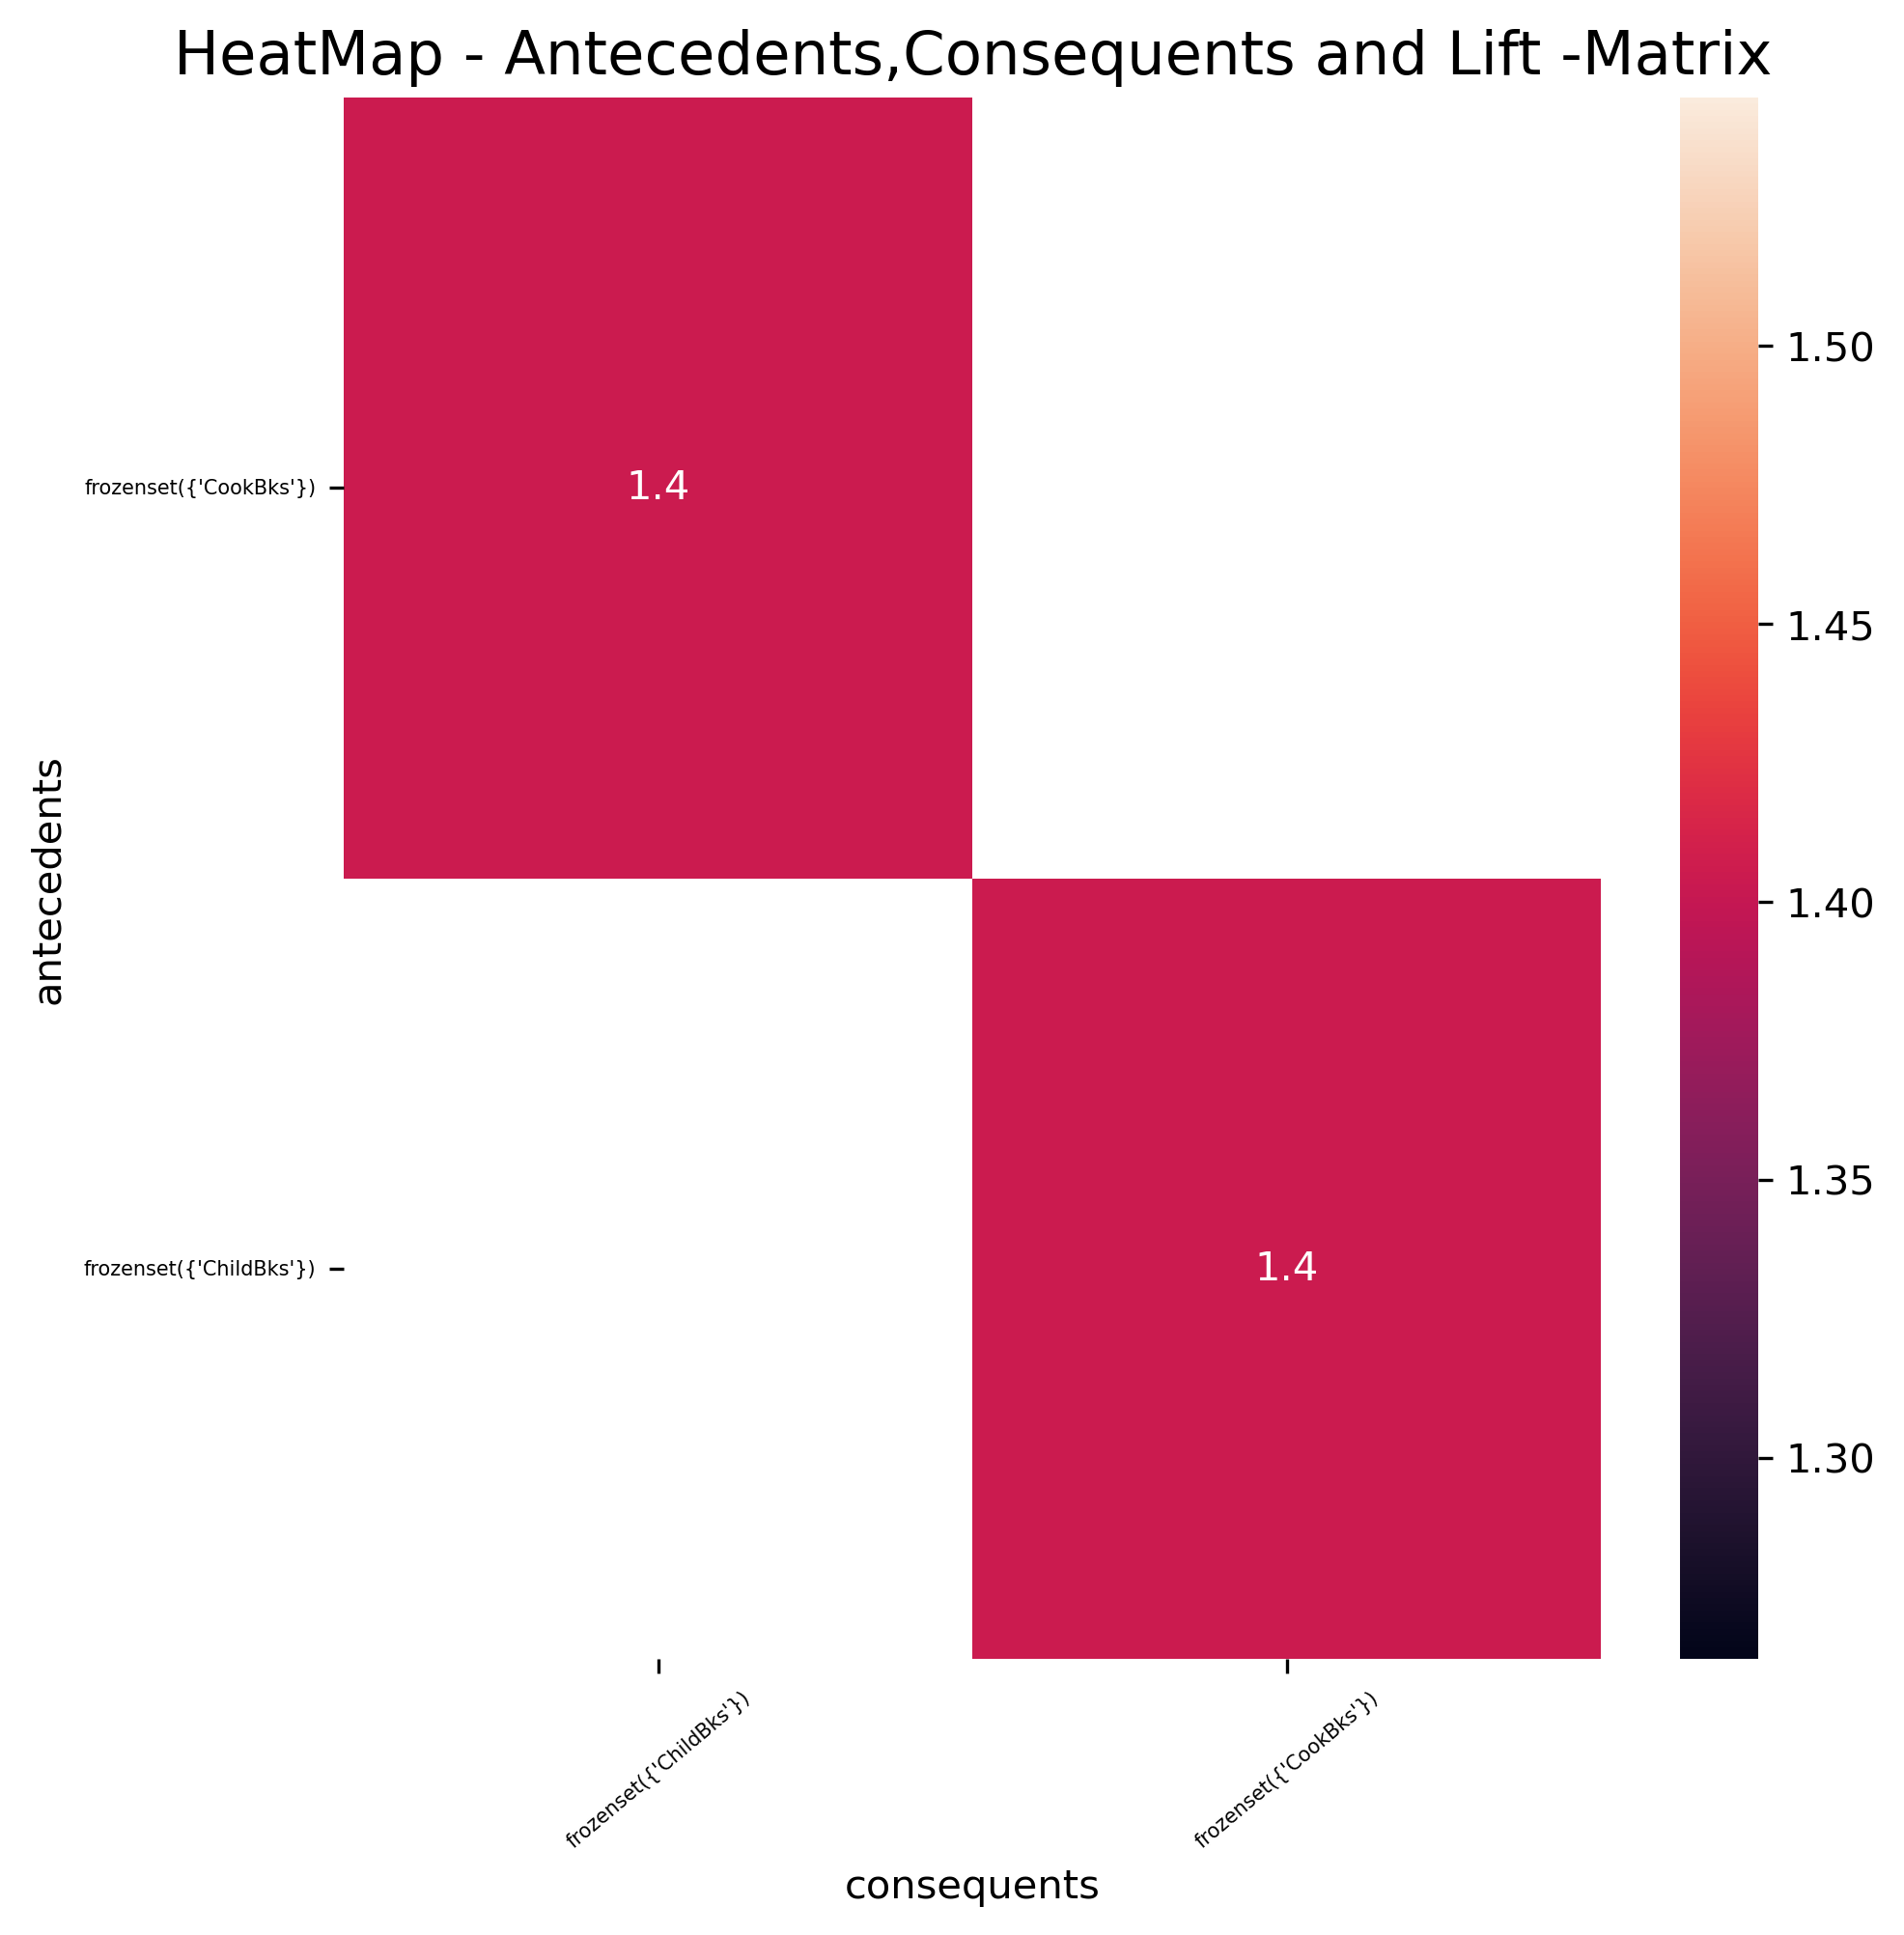

In [45]:

print(' Trail1 support = 13%,confidence=30%')
lift_plot(rules1_sorted)
print('\n Trail2 support = 15%,confidence=50%')
lift_plot(rules2_sorted)
print('\n Trail3 support = 20%,confidence=70%')
lift_plot(rules3_sorted)

CONCLUSION : 

Trail1 & trail 2 are giving good association when compared with trail 3 as displayed above

Problem-2)

Prepare rules for the my movies data sets

Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

Change the minimum length in apriori algorithm

Visulize the obtained rules using different plots

In [70]:
movie=pd.read_csv("my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


EDA

In [79]:
movies=movie.iloc[:,5:]
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [80]:
movies.shape

(10, 10)

In [81]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [82]:
movies.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [83]:

movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
for i in movies.columns:
  print('\n Number of unique oservations in',movies[i].name,':',len(movies[i].unique()))
  print(' \n Different observations with count in ',movies[i].name,':\n',movies[i].value_counts())
  print('------------------------------------------------------------------')


 Number of unique oservations in Sixth Sense : 2
 
 Different observations with count in  Sixth Sense :
 1    6
0    4
Name: Sixth Sense, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in Gladiator : 2
 
 Different observations with count in  Gladiator :
 1    7
0    3
Name: Gladiator, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in LOTR1 : 2
 
 Different observations with count in  LOTR1 :
 0    8
1    2
Name: LOTR1, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in Harry Potter1 : 2
 
 Different observations with count in  Harry Potter1 :
 0    8
1    2
Name: Harry Potter1, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in Patriot : 2
 
 Different observations with count in  Patriot :
 1    6
0    4
Name: Patriot, dtype: int64
--

VISUALISATION


In [86]:
movie_counts=pd.DataFrame(movies.sum()).reset_index()
movie_counts.rename(columns={'index':'movie_geners',0:'views'},inplace=True)
movie_counts=movie_counts.sort_values('views',ascending=False).reset_index()
movie_counts=movie_counts.drop('index',axis=1)
movie_counts

,movie_geners,views
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


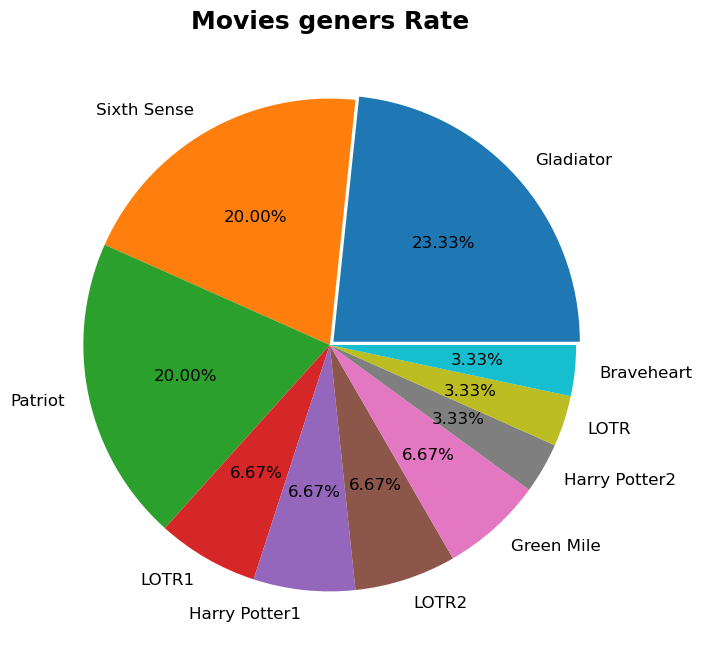

In [87]:
plt.figure(figsize = (8,8))
plt.pie(movie_counts['views'], labels= movie_counts['movie_geners'],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', textprops = {'size': 12})
plt.title("Movies geners Rate", fontsize = 18, fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Movie Geners Frequency')

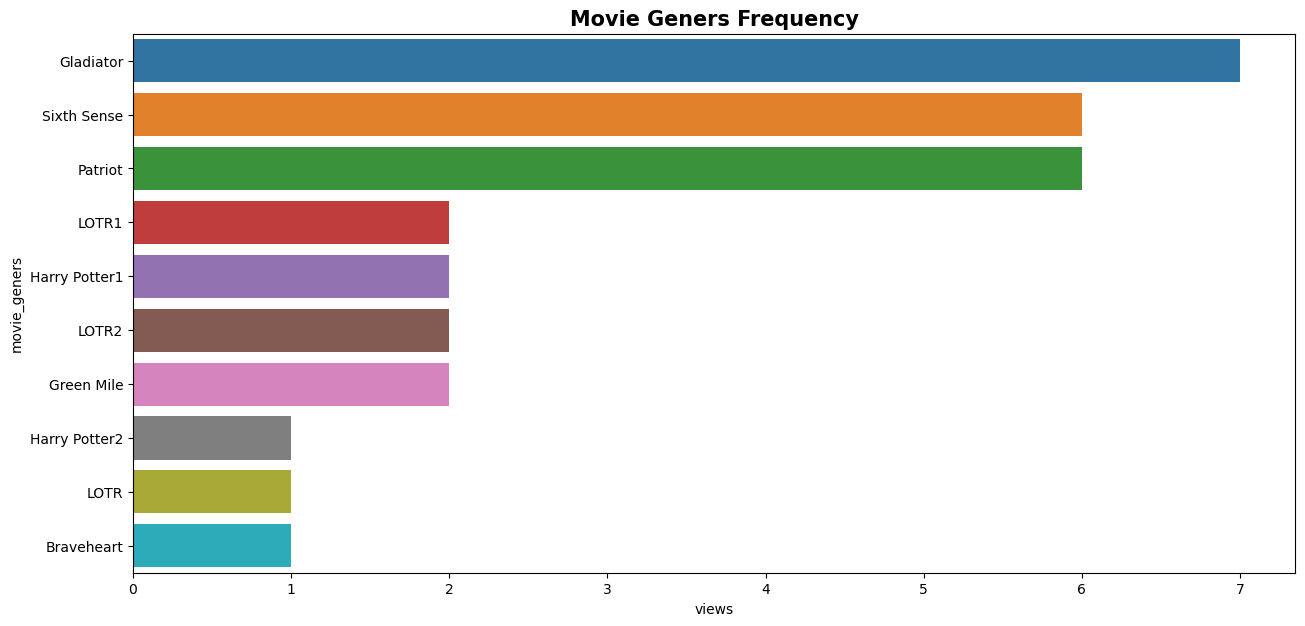

In [88]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x = 'views', y = 'movie_geners', data= movie_counts)
plt.title('Movie Geners Frequency',  fontsize = 15, fontweight = 'bold')

Apriori Algorithm

TRAIL 1 

Support 15% confidence 30%

In [90]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets1=apriori(movies,min_support=0.20,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [91]:
rules1=association_rules(frequent_itemsets1,metric="lift",min_threshold=0.4)
rules1_sorted=rules1.sort_values('lift',ascending=False)
rules1_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
13,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
15,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


Text(0.5, 0, 'lift')

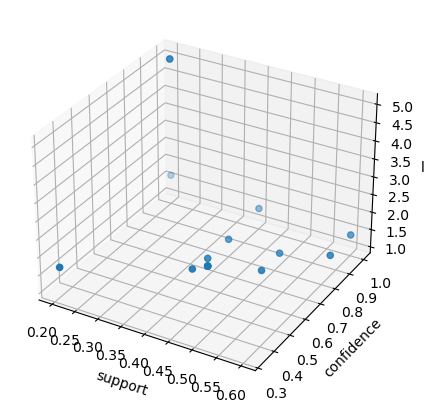

In [92]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules1_sorted['support'],rules1_sorted['confidence'],rules1_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

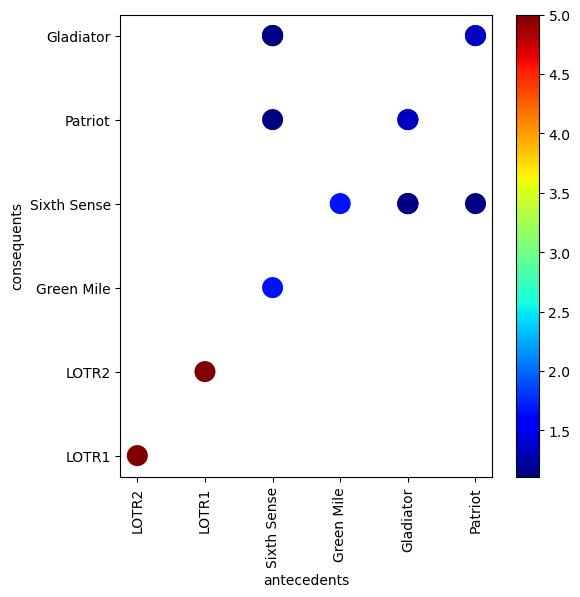

In [93]:
X = rules1_sorted.antecedents
Y = rules1_sorted.consequents
Z = rules1_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

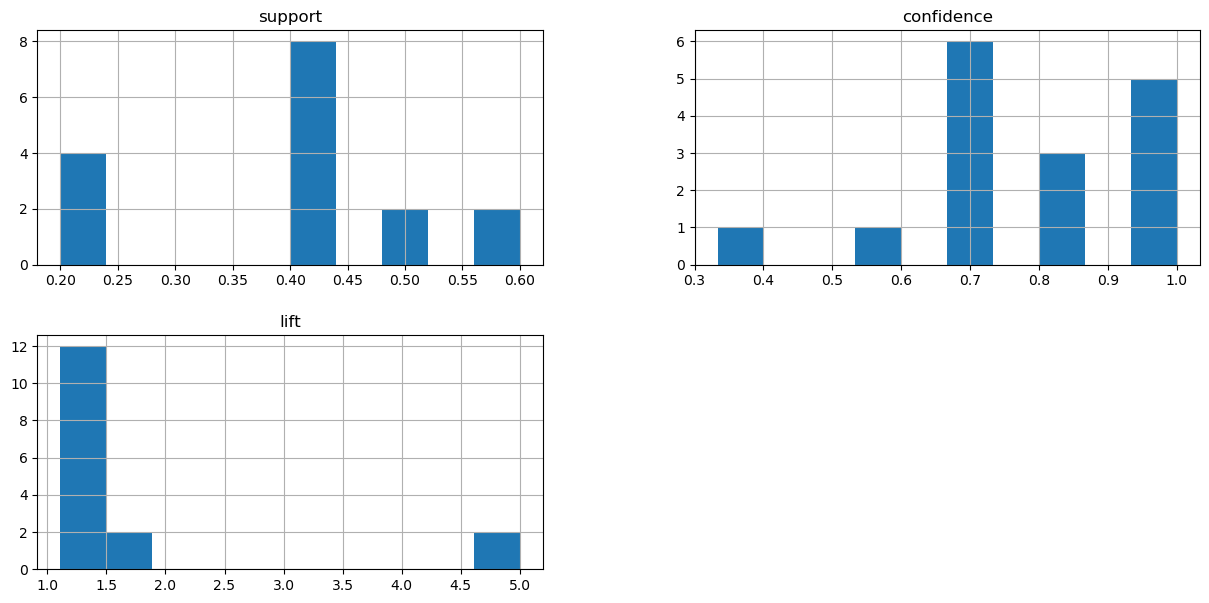

In [94]:
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

Trail-2

support 20%,confidence 50%

In [96]:
frequent_itemsets2=apriori(movies,min_support=0.30,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Sixth Sense, Patriot)"


In [97]:
rules2=association_rules(frequent_itemsets2,metric="lift",min_threshold=0.5)
rules2_sorted=rules2.sort_values('lift',ascending=False)
rules2_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
11,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


Text(0.5, 0, 'lift')

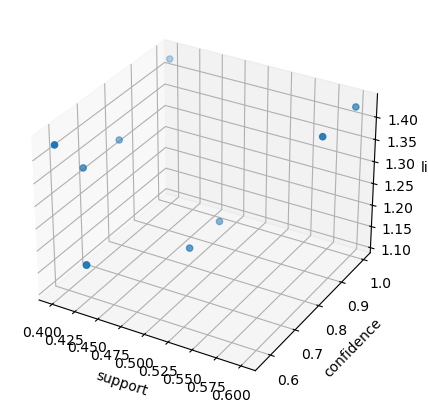

In [98]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules2_sorted['support'],rules2_sorted['confidence'],rules2_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

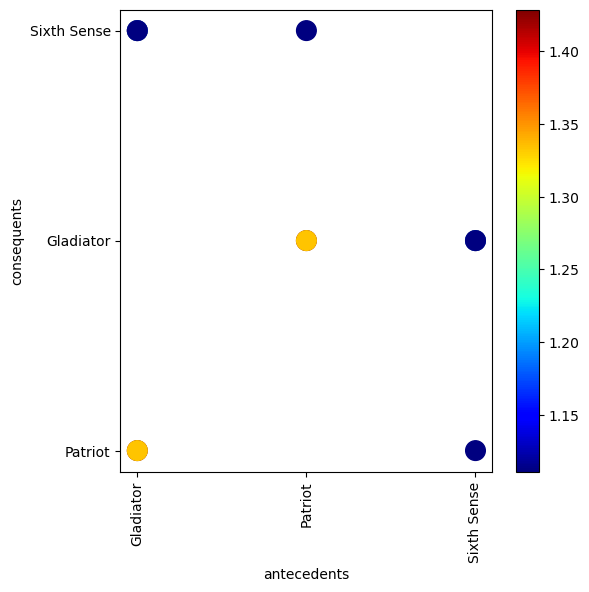

In [99]:

X = rules2_sorted.antecedents
Y = rules2_sorted.consequents
Z = rules2_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

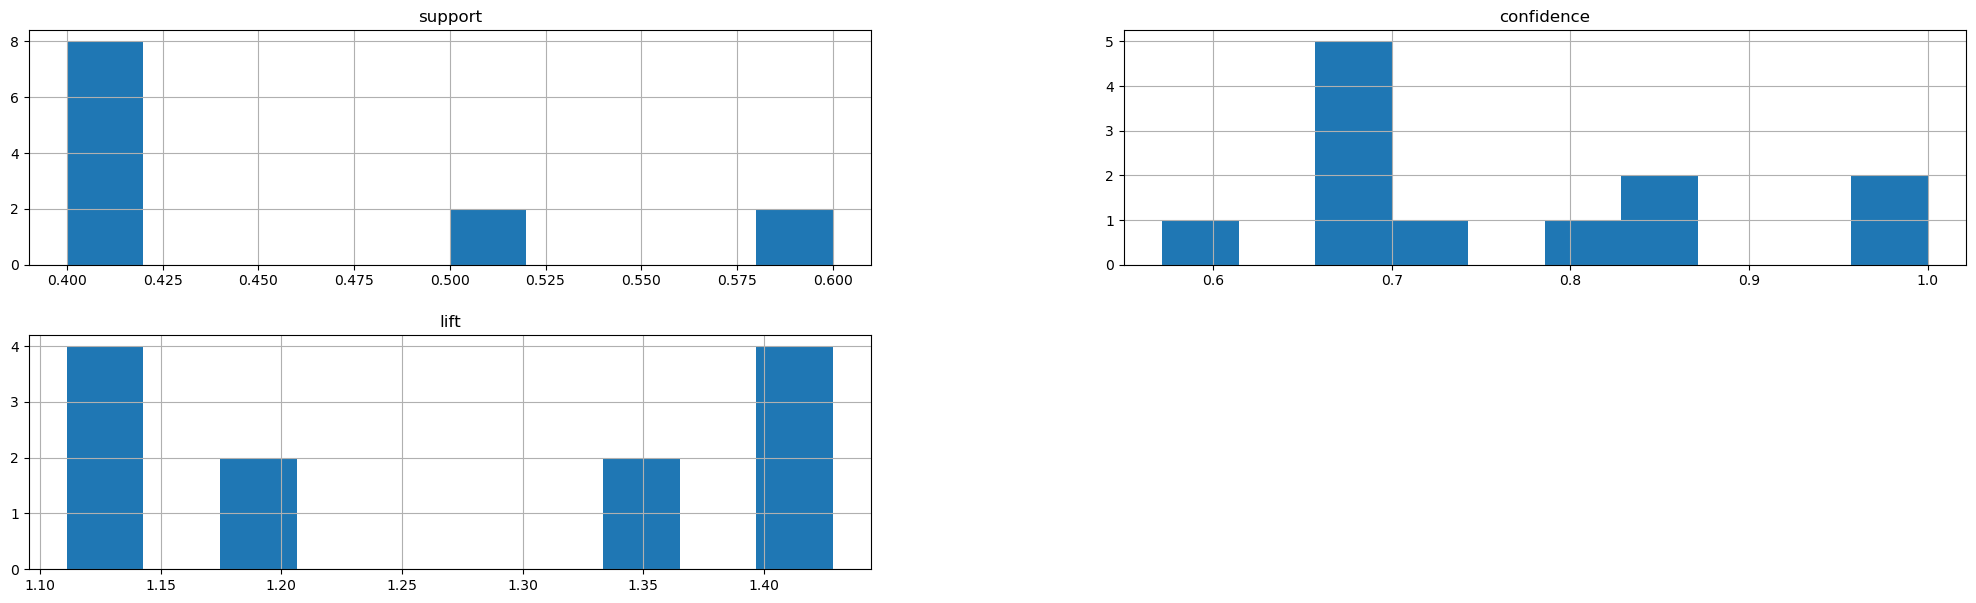

In [100]:
rules2[['support','confidence','lift']].hist(figsize=(25,7))
plt.show()

Trail-3

support 30%,confidence 60%

In [102]:
frequent_itemsets3=apriori(movies,min_support=0.40,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Sixth Sense, Patriot)"


In [103]:
rules3=association_rules(frequent_itemsets3,metric="lift",min_threshold=0.6).reset_index()
rules3_sorted=rules3.sort_values('lift',ascending=False)
rules3_sorted

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
9,9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
6,6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
11,11,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
1,1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
0,0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


In [104]:
rules3_sorted.iloc[0:10]

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
9,9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
6,6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
11,11,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
1,1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
0,0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


Text(0.5, 0, 'lift')

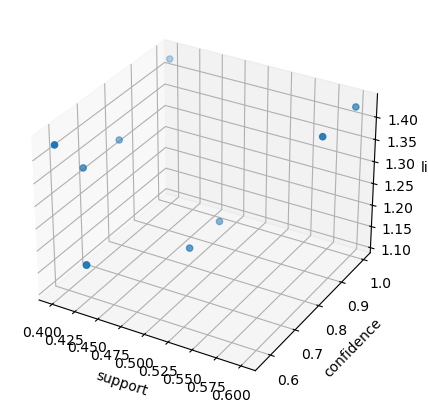

In [105]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules3_sorted['support'],rules3_sorted['confidence'],rules3_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

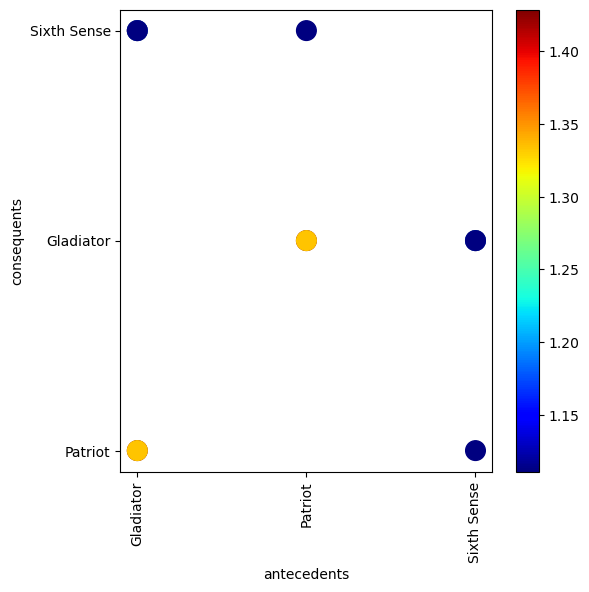

In [106]:

X = rules3_sorted.antecedents
Y = rules3_sorted.consequents
Z = rules3_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

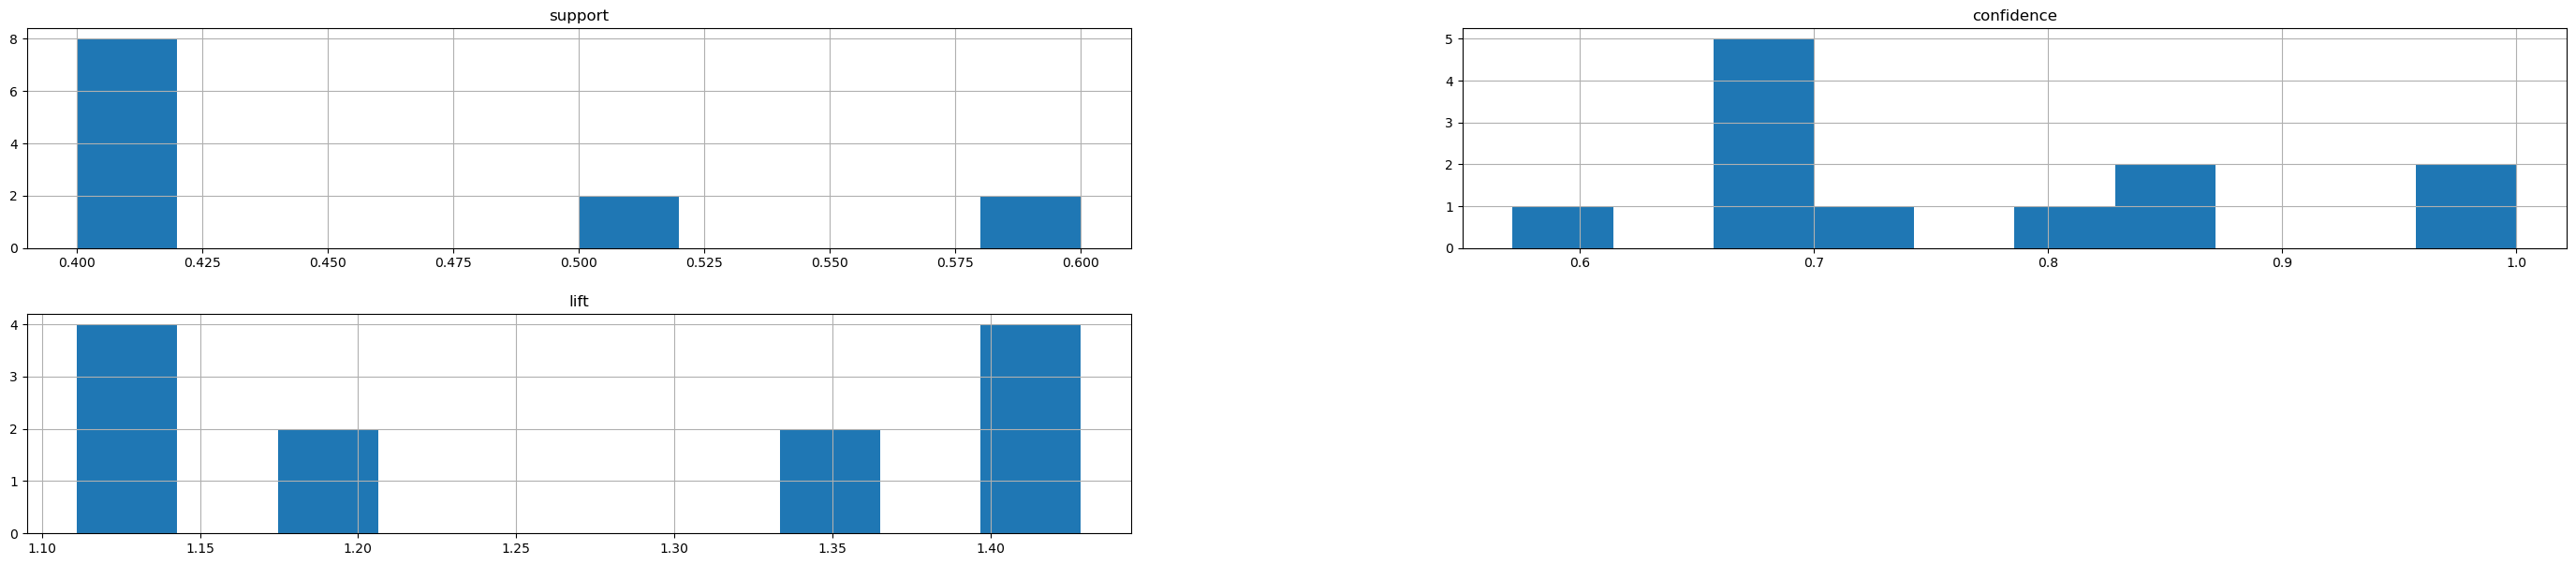

In [107]:
rules3[['support','confidence','lift']].hist(figsize=(35,7))
plt.show()

In [108]:
def lift_plot(table):
  plt.figure(figsize=(3,3), dpi= 300)
  sns.heatmap(table.pivot('antecedents','consequents','lift'), annot=True)
  plt.title('HeatMap - Antecedents,Consequents and Lift -Matrix',fontsize= 15)
  plt.yticks(rotation=0, fontsize= 5)
  plt.xticks(rotation=40, fontsize= 5)
  plt.show()

 Trail1 support = 15%,confidence=30%


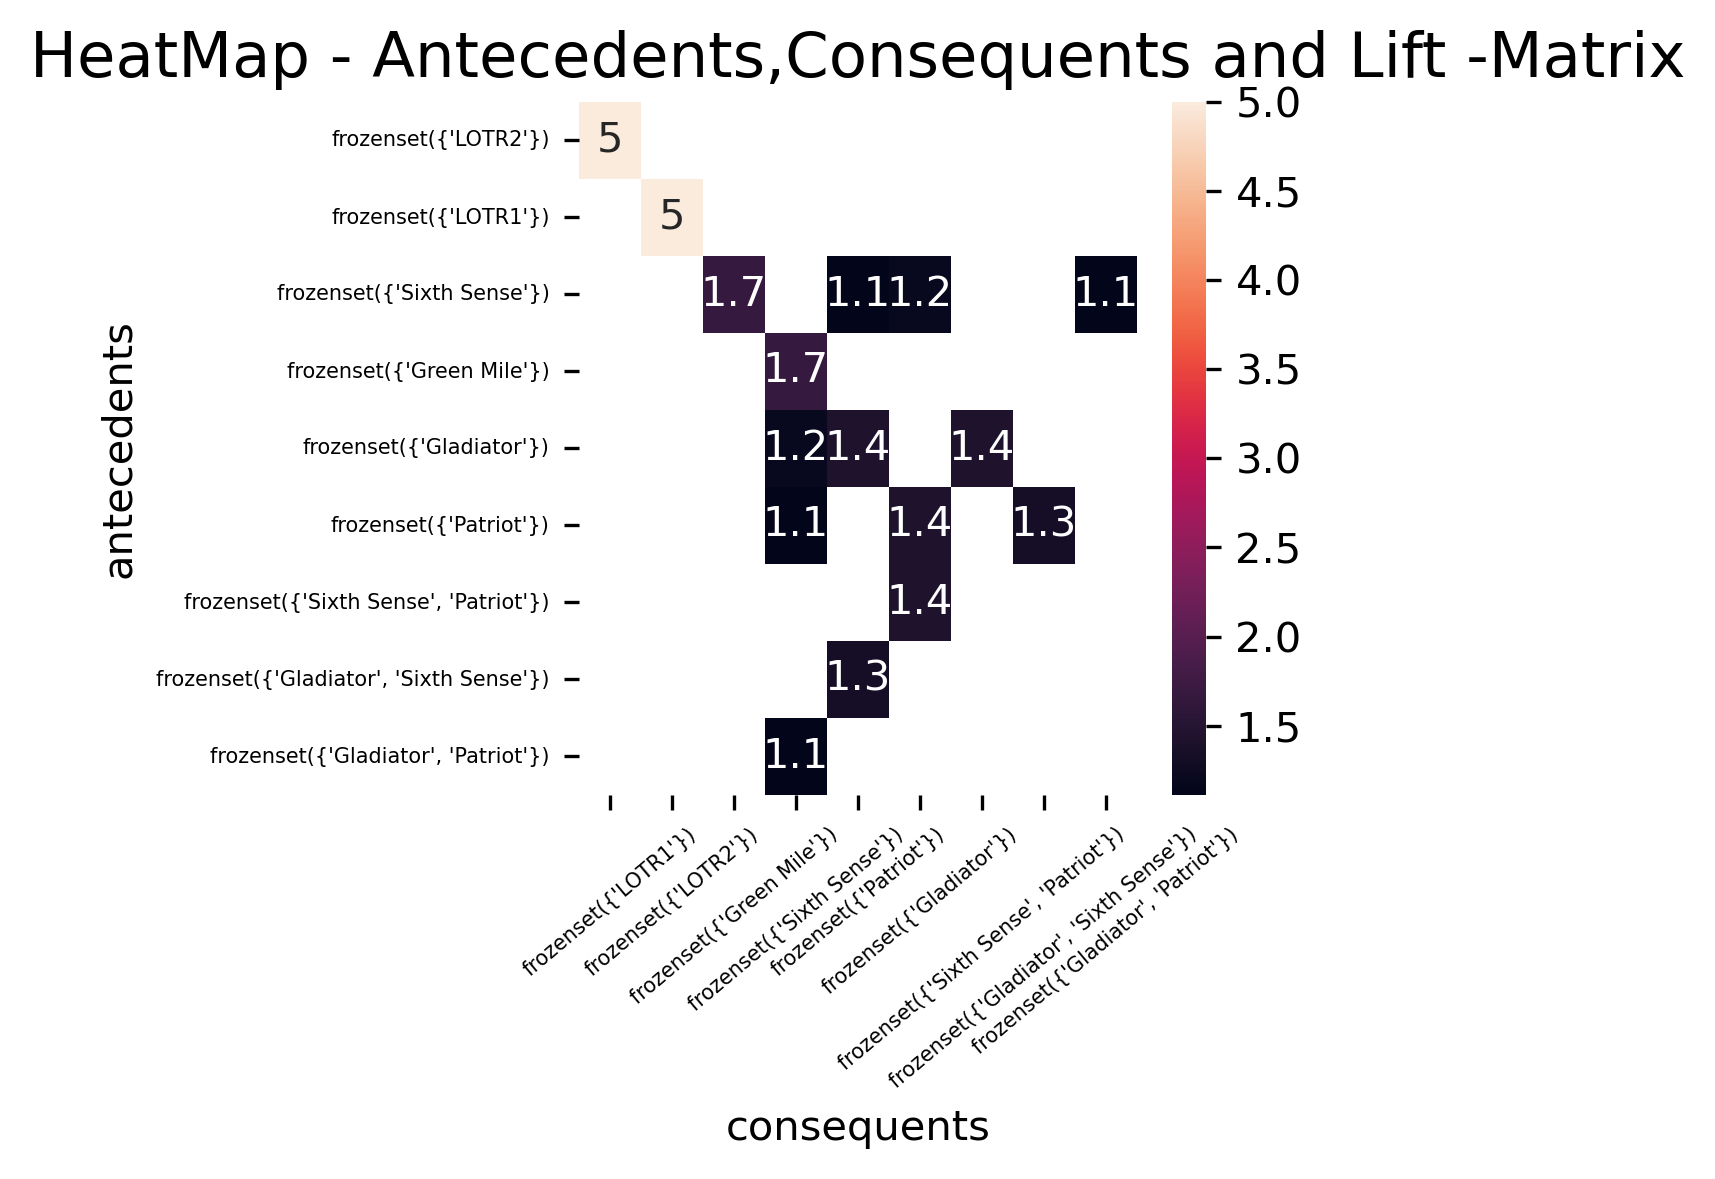


 Trail2 support = 20%,confidence=50%


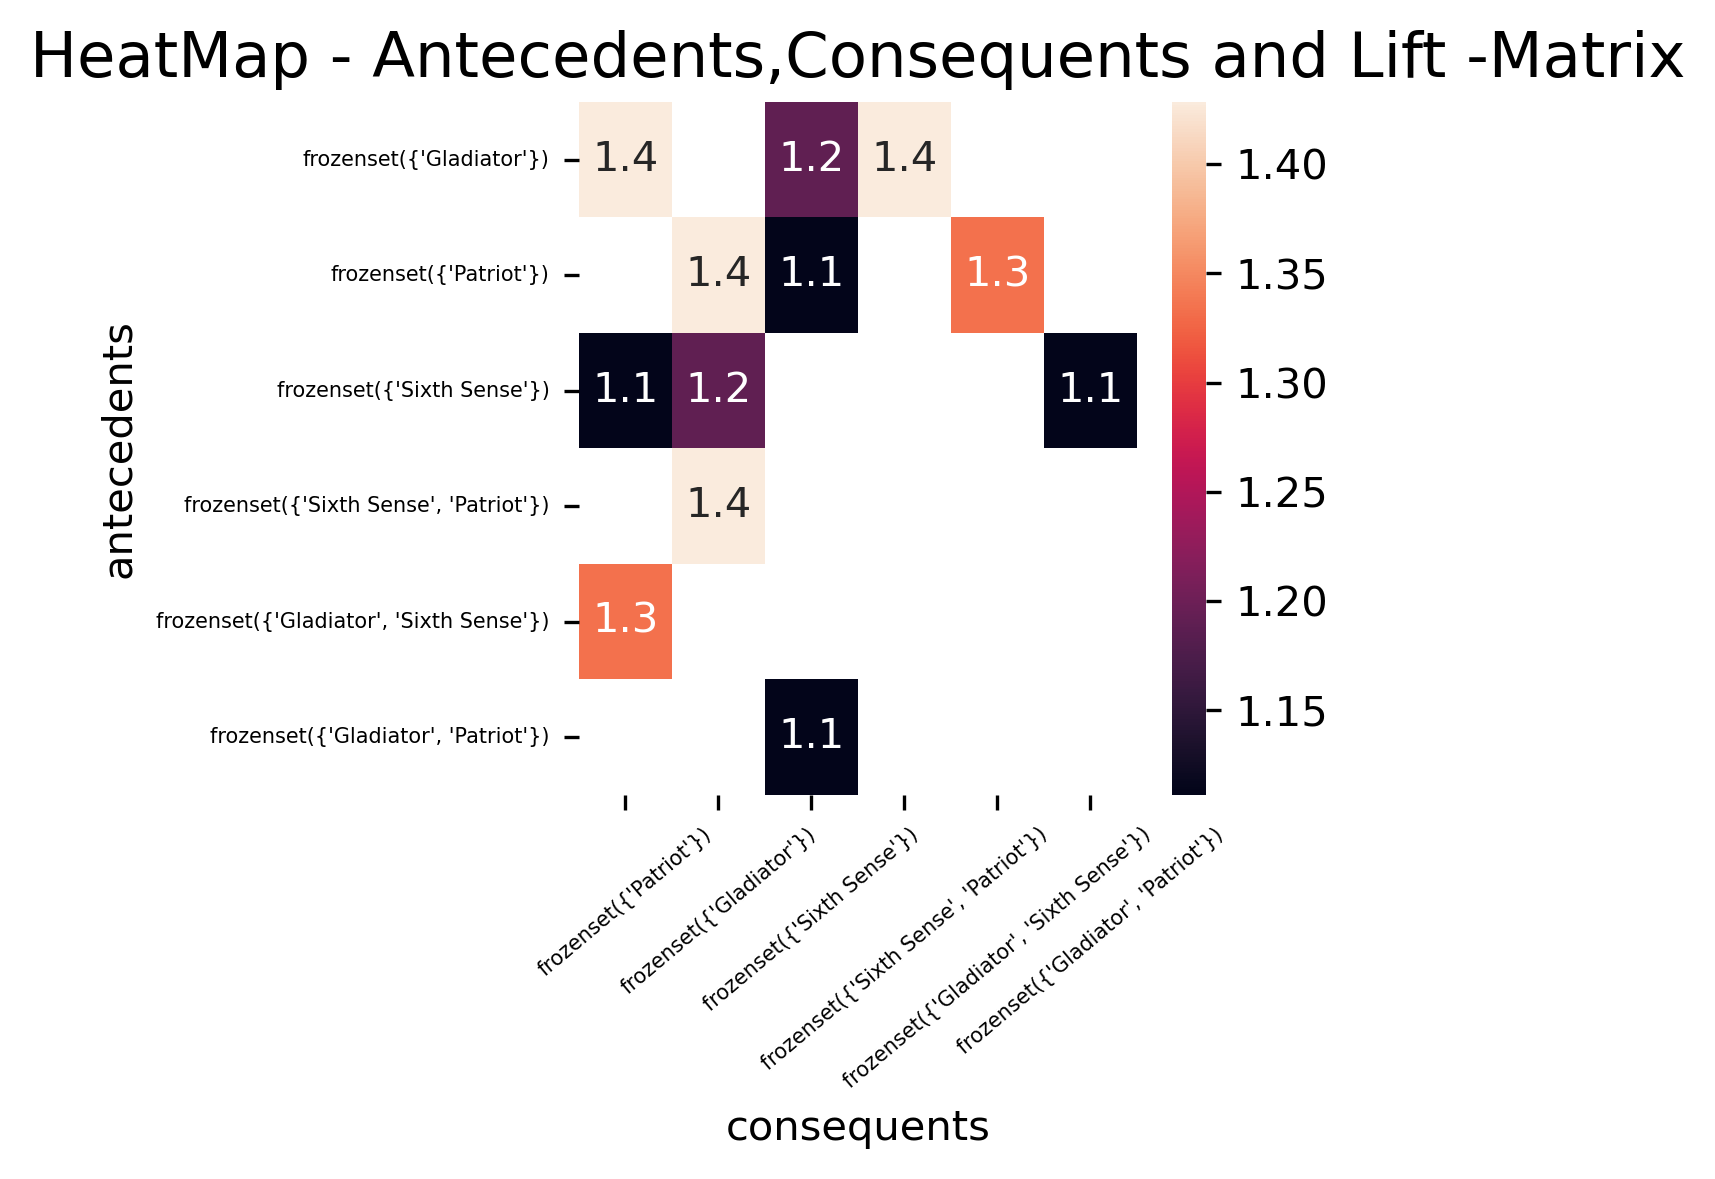


 Trail3 support = 30%,confidence=60%


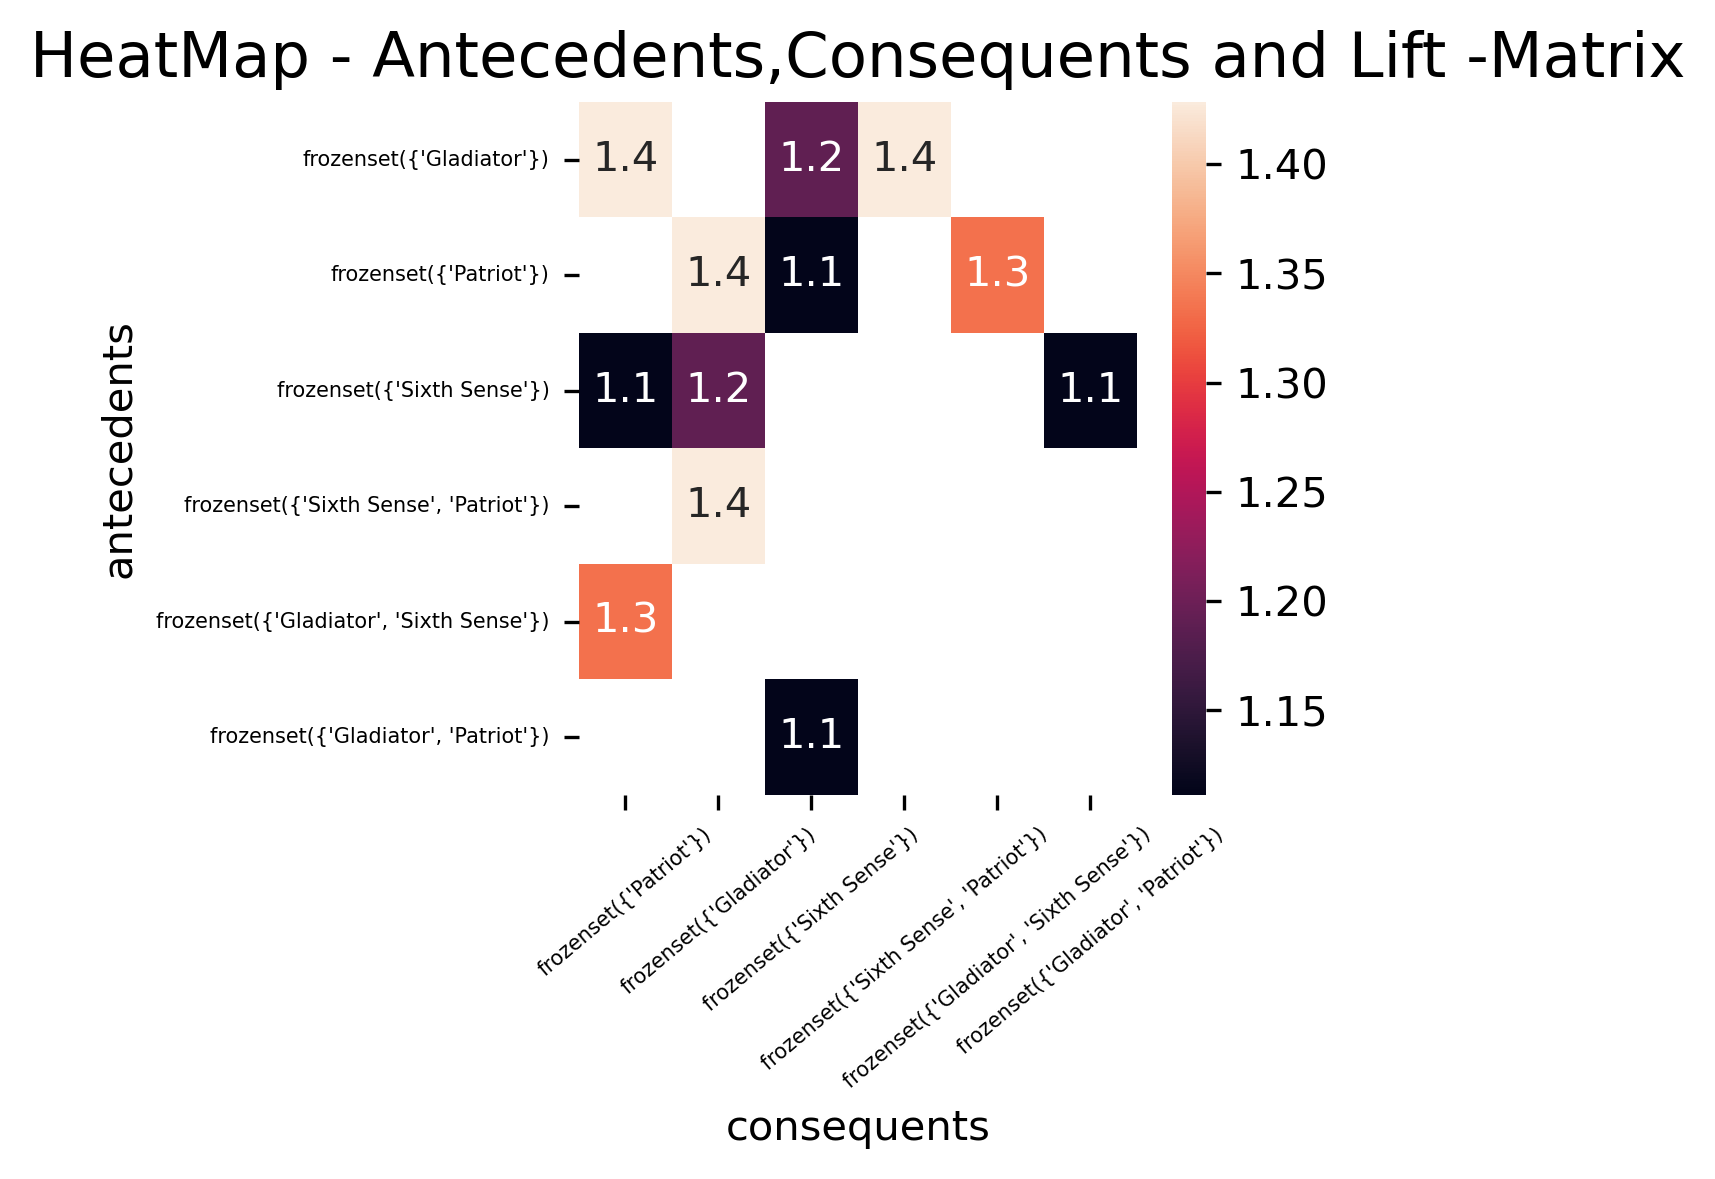

In [109]:

print(' Trail1 support = 15%,confidence=30%')
lift_plot(rules1_sorted)
print('\n Trail2 support = 20%,confidence=50%')
lift_plot(rules2_sorted)
print('\n Trail3 support = 30%,confidence=60%')
lift_plot(rules3_sorted)

CONCLUSION 

Trail 1 is having good association when compared with other two trails 

Both Trail2 & trail3 are having similar association 